In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from mglearn.plots import plot_2d_classification

## Wine data

In [15]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [16]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
sy=pd.Series(wine.target,dtype="category")
sy=sy.cat.rename_categories(wine.target_names)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)
## 먼저 wine data를 train data set과 test data set으로 분류
x_train, x_validation, y_train,y_validation=train_test_split(x_train,y_train, test_size = 0.1)
## 그 다음 train data set 중 10%를 validation으로 분류



In [18]:
wine_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
#깊이를 3까지하고, 표준을 gini로하는 트리 생성
wine_tree=wine_tree.fit(x_train,y_train)
#생성된 트리에 x_train,y_train data를 넣어서 fit하여 학습

In [19]:
wine_pred=wine_tree.predict(x_test)
print('Accuracy:%2.f'%accuracy_score(y_test,wine_pred))

Accuracy: 1


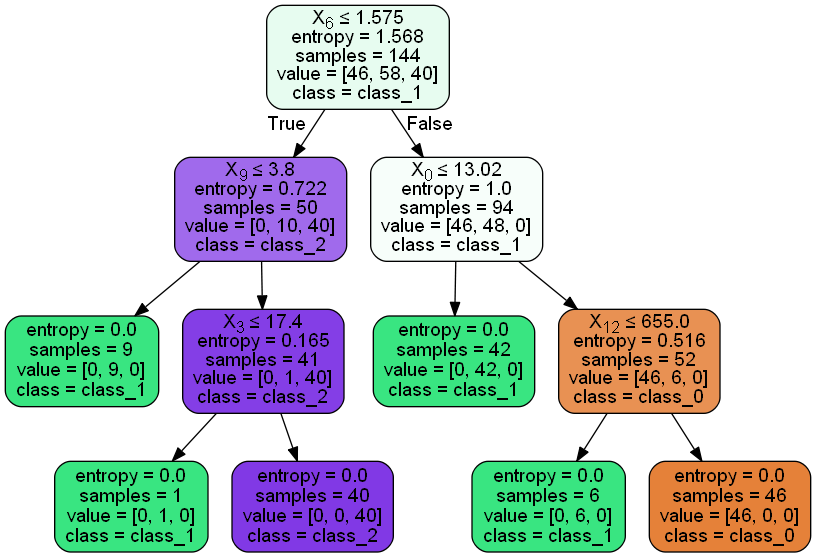

In [20]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data=export_graphviz(wine_tree,out_file=None,class_names=wine.target_names,filled=True,
                         rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [21]:
from sklearn.ensemble import RandomForestClassifier

wine_tree=RandomForestClassifier()
wine_tree.fit(x_train,y_train)
print("랜덤포레스트->:{:.2%}".format(wine_tree.score(x_test,y_test)))


랜덤포레스트->:100.00%


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.ensemble import BaggingClassifier
wine_tree=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=10).fit(x_train,y_train)
print("bagging->:{:.2%}".format(wine_tree.score(x_validation,y_validation)))

bagging->:100.00%


In [23]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[label] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


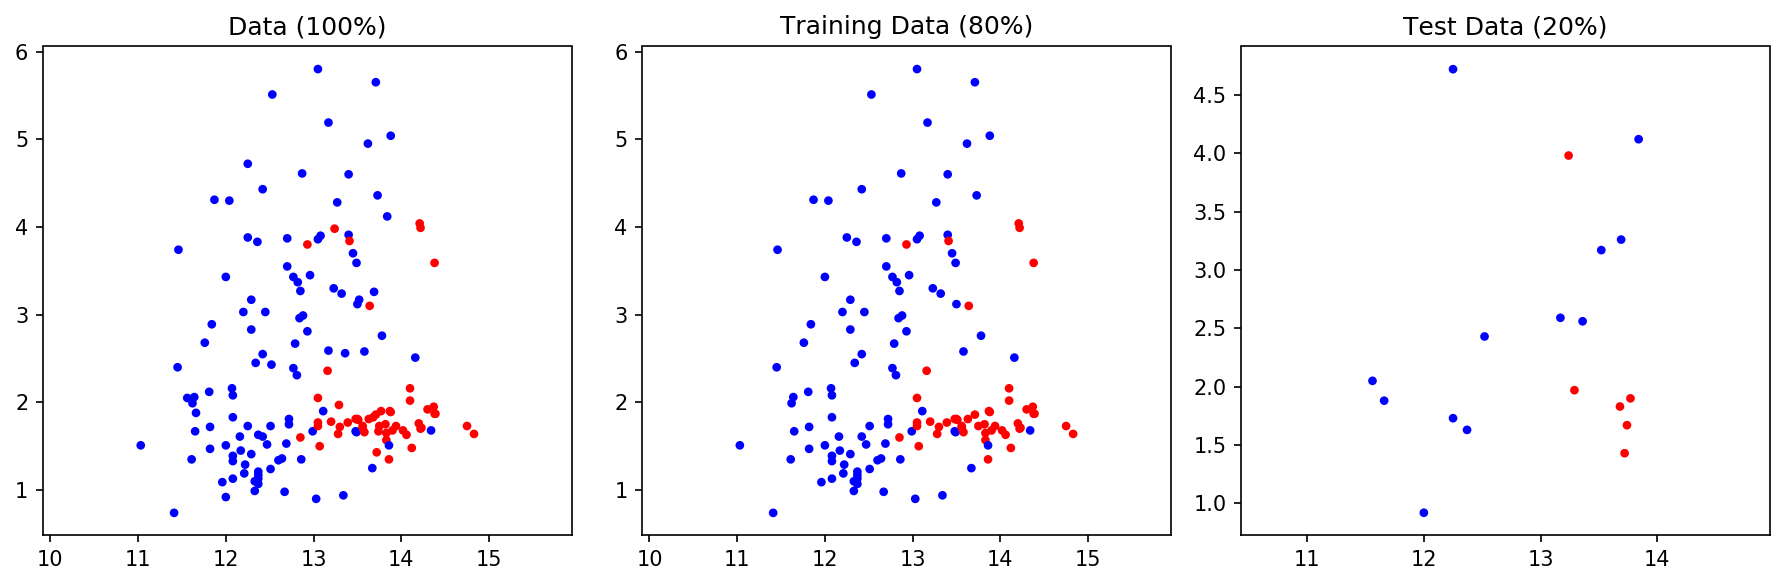

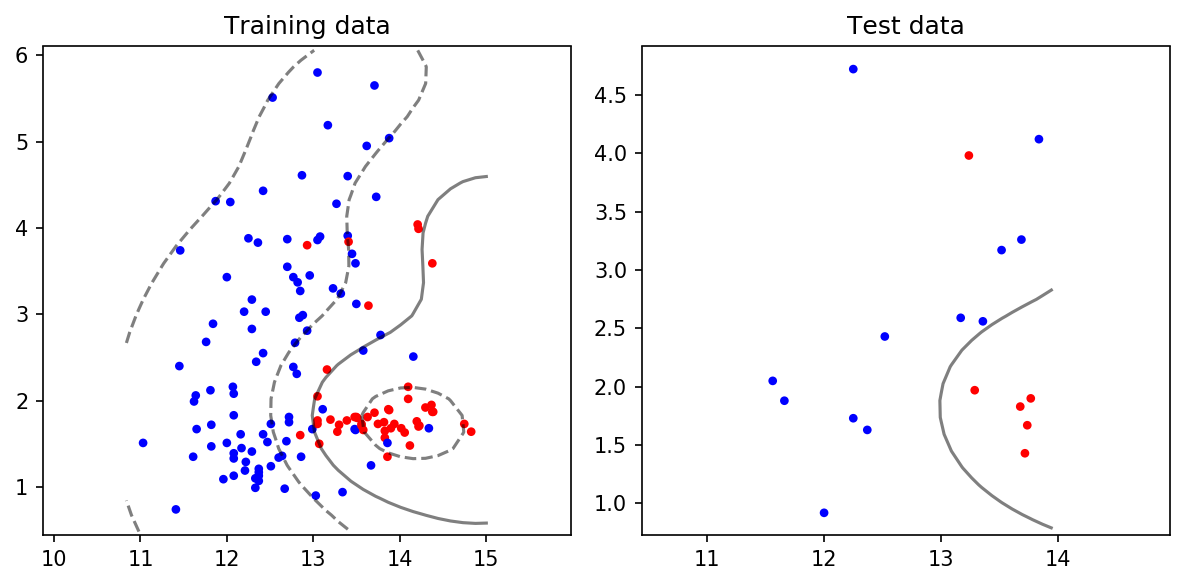

Accuracy:94.44444444444444%


In [26]:

import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
X,Y=wine.data,wine.target
X2=X[:,:2]
Y2=Y.copy()
Y2[(Y2==2)]=1
## wine data처럼 class가 3개인 경우 시각화하기 힘들기 때문에 
## 다시 wine.target 의 class 가 2인 경우 1로 바꿔 class를 2개로 만들었다.

x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.1)
x_train, x_validation, y_train,y_validation=train_test_split(x_train,y_train, test_size = 0.1)

##위와 같이 전처리한 데이터를 다시 3개의 set으로 나눴다.

clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
## rbf svm 을 traing 시키는 과정
plot_data(x_train,y_train,x_test,y_test)
plot_decision_function(x_train,y_train,x_test,y_test,clf)
clf_predictions=clf.predict(x_test)
print("Accuracy:{}%".format(clf.score(x_test,y_test)*100))
## rgf svm 을 시각화하는 과정

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit,LeaveOneOut

x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.1)



In [28]:
startifiled_shuffle_split=StratifiedShuffleSplit(train_size=0.9,
                                                test_size=0.1,n_splits=5,
                                                random_state=0)

loo=LeaveOneOut()
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
score=cross_val_score(clf,x_train,y_train,cv=startifiled_shuffle_split)
print("score:{}".format(score))
print("mean:",score.mean())

for train_index,test_index in startifiled_shuffle_split.split(x_train,y_train):
    
    X_train,X_test=x_train[train_index],x_train[test_index]
    Y_train,Y_test=y_train[train_index],y_train[test_index]
    plot_decision_function(X_train,Y_train,X_test,Y_test,clf)


NameError: name 'cross_val_score' is not defined

In [29]:

for train_index,test_index in startifiled_shuffle_split.split(x_train,y_train):
    
    X_train,X_test=x_train[train_index],x_train[test_index]
    Y_train,Y_test=y_train[train_index],y_train[test_index]
    plot_decision_function(X_train,Y_train,X_test,Y_test,clf

SyntaxError: unexpected EOF while parsing (<ipython-input-29-20e5146ac2be>, line 5)

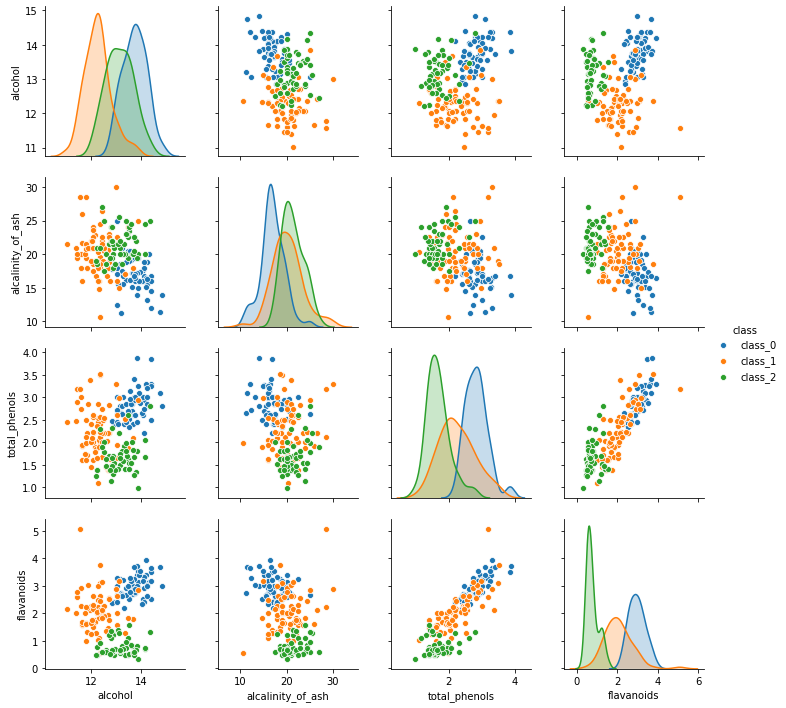

In [35]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
sy=pd.Series(wine.target,dtype="category")
sy=sy.cat.rename_categories(wine.target_names)
df['class']=sy
sns.pairplot(vars=["alcohol","alcalinity_of_ash","total_phenols","flavanoids"],hue="class",data=df)
plt.show()